In [ ]:
try:
    # install for jupyterlite if needed
    import piplite
    await piplite.install()

except (ImportError, SyntaxError):
    pass # not running in jupyterlite

In [1]:
from mathpad import *

# simple pendulum example using lagrange

theta = "theta(t)" * rad
m = "m" * kg
l = "l" * meters
g = "g" * meters / second ** 2

In [2]:
# abs velocity of pendulum
v = l * diff(theta)

from mathpad.mech import euler_lagrange, kinetic_energy, gravitational_energy

T = kinetic_energy(m, v)
T

0.5*l**2*m*Derivative(theta(t), t)**2 kilogram*meters**2*radian**2/second**2

In [3]:
# potential energy
h = l * cos(theta)
V = -gravitational_energy(m, h, g)
V

-g*l*m*cos(theta(t)) kilogram*meters**2/second**2

In [4]:
theta_dynamics = euler_lagrange(T, V, 0, theta)
theta_dynamics

l*m*(g*sin(theta(t)) + l*Derivative(theta(t), (t, 2))) = 0 kilogram*meter**2*radian/second**2

Solving subbed Equations
Solving finished. Simulating...


  0%|          | 0/5 [00:00<?, ?it/s]

Simulation finished. Plotting...


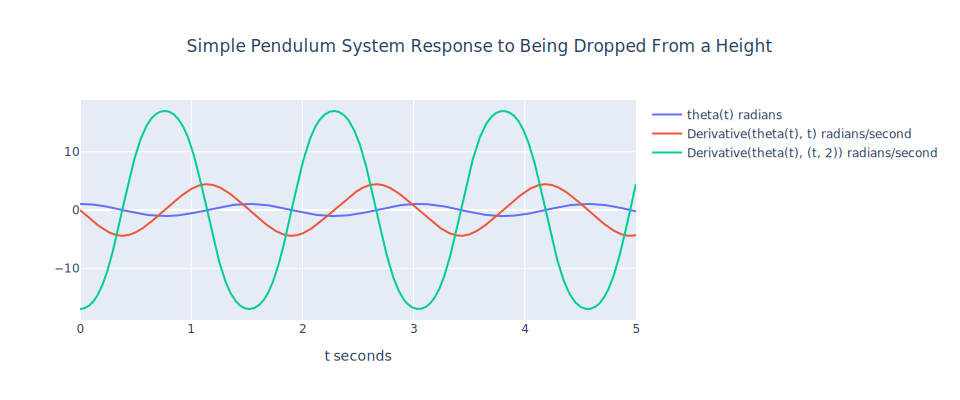

In [5]:
sim_data = simulate_dynamic_system(
    [theta_dynamics],
    plot_title="Simple Pendulum System Response to Being Dropped From a Height",
    x_f=5, max_step=0.01,
    substitute={
        g: 9.81,
        l: 0.5
    },
    initial_conditions={
        theta: pi / 3,
        diff(theta): 0
    },
    record=[theta, diff(theta), diff(theta, n=2)], # type: ignore
    plot_static=True
)